# UFC Winner Classifier Project

# Abstract

This project is based on the Ultimate UFC Dataset which merged all public Kaggle UFC datasets. This project really interested me because I wanted to see if I could create a machine learning model that could potentially predict the winner of a match. In this dataset, I used the 'ufc-master.csv' file provided on Kaggle by user mdabbert. I will provide the link if you would like to learn more about the data itself. I also created a streamlit app that is user friendly if they wanted to play around with that as well with dynamic input settings. The final model that is used to classify the winner of a ufc match is a Gradient Boosting Classifier and I will show you the process in this project of how I arrived to this conclusion. The final accuracy of the model was 94.4% which proved my project was successful. 

The link to the dataset is here:
https://www.kaggle.com/mdabbert/ultimate-ufc-dataset?select=upcoming-event.csv

In [5]:
#Load all necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import shap
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import xgboost 
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import auc
from explainerdashboard import ClassifierExplainer
from sklearn.inspection import plot_partial_dependence
from bayes_opt import BayesianOptimization
%matplotlib inline

# I. Load in Data

## A) Load Data and Analyze First 5 Rows

In [6]:
#Load in data
df = pd.read_csv('ufc-master.csv')

In [7]:
#View first 5 rows
df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Dustin Poirier,Conor McGregor,250,-305,250.000000,32.786885,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dan Hooker,Michael Chandler,-134,105,74.626866,105.000000,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jessica Eye,Joanne Calderwood,-105,-117,95.238095,85.470085,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andrew Sanchez,Makhmud Muradov,115,-143,115.000000,69.930070,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Marina Rodriguez,Amanda Ribas,250,-335,250.000000,29.850746,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## B) Dataset Information

In [8]:
# View information about the dataset
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4558 entries, 0 to 4557
Data columns (total 137 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4558 non-null   object 
 1   B_fighter                     4558 non-null   object 
 2   R_odds                        4558 non-null   int64  
 3   B_odds                        4558 non-null   int64  
 4   R_ev                          4558 non-null   float64
 5   B_ev                          4558 non-null   float64
 6   date                          4558 non-null   object 
 7   location                      4558 non-null   object 
 8   country                       4558 non-null   object 
 9   Winner                        4558 non-null   object 
 10  title_bout                    4558 non-null   bool   
 11  weight_class                  4558 non-null   object 
 12  gender                        4558 non-null   object 
 13  no

## C) Dataset Summary Statistics

In [9]:
#View summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R_odds,4558.0,-118.944054,271.152766,-1700.000000,-258.750000,-150.000000,128.75,775.0
B_odds,4558.0,67.533348,250.177538,-1200.000000,-145.000000,130.000000,220.00,1300.0
R_ev,4558.0,95.144728,84.115693,5.882353,38.650075,66.666667,128.75,775.0
B_ev,4558.0,168.710766,138.689295,8.333333,68.965517,130.000000,223.75,1300.0
no_of_rounds,4558.0,3.180123,0.568564,3.000000,3.000000,3.000000,3.00,5.0
...,...,...,...,...,...,...,...,...
B_sub_attempts_bout,2772.0,0.331890,0.764293,0.000000,0.000000,0.000000,0.00,7.0
R_pass_bout,2772.0,1.245671,2.136931,0.000000,0.000000,0.000000,2.00,26.0
B_pass_bout,2772.0,0.920274,1.746407,0.000000,0.000000,0.000000,1.00,14.0
R_rev_bout,2772.0,0.137807,0.428739,0.000000,0.000000,0.000000,0.00,5.0


## D) Convert Date Column to Pandas Datetime Object

In [10]:
#Convert date to pandas datetime object
df['date'] = pd.to_datetime(df['date'])

# II. Conduct Exploratory Analysis

After completing the initial steps of loading the libraries and analyzing the raw data, I will conduct exploratory analysis. I will now conduct exploratory analysis which is an important step in the machine learning process to learn more about the data. This helps with the next step of cleaning the data so that it can be used for machine learning.

## A) Analyze Target Column Categories

In [11]:
#Get a good idea how many of each type of winner is provided in the dataset
df['Winner'].value_counts()

Red     2671
Blue    1887
Name: Winner, dtype: int64

## B) Create Boxplot of Red and Blue Fighter Odds

In [12]:
#Instantiate Figure class
fig = go.Figure()
#Adjust components of plot for red fighter
fig.add_trace(go.Box(y = df['R_odds'], boxpoints = 'all', name = 'Red Fighter', line = dict(color = 'red')))
#Adjust componet of plot for blue fighter
fig.add_trace(go.Box(y = df['B_odds'], boxpoints = 'all', name = 'Blue Fighter', line = dict(color = 'blue')))

#Adjust layout overall
fig.update_layout(

    title = 'Red Fighter and Blue Fighter Odds Boxplot',
    paper_bgcolor = 'white',
    xaxis_title = 'Fighter Color',
    yaxis_title = 'Odds'
)


## C) Create Countplot of Weight Classes

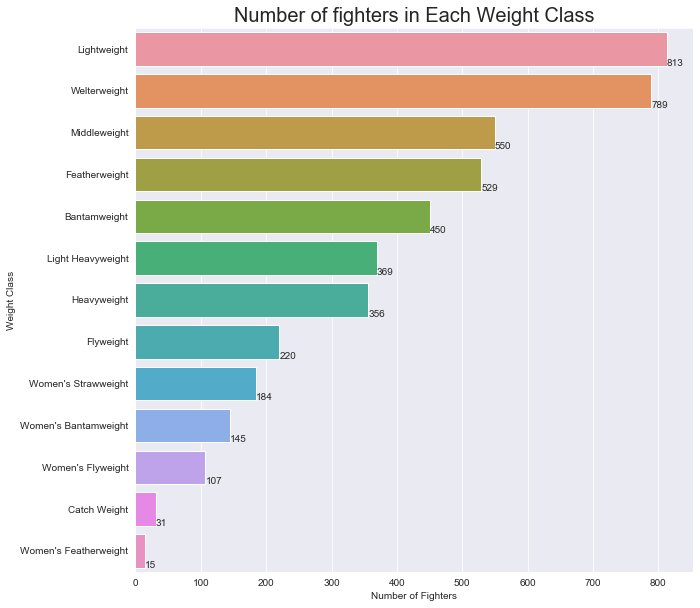

In [13]:
#Analyze the most popular weight class to the least popular weight class
sns.set_style('darkgrid')
#Create fig, ax objects
fig, ax = plt.subplots(figsize = (10,10))
#Create Countplot of the different weight classes
sns.countplot(data = df, y = 'weight_class', order = df['weight_class'].value_counts().index, ax = ax)
#Set the title
ax.set_title('Number of fighters in Each Weight Class', fontsize = 20)
#Set x, y labels
ax.set_xlabel('Number of Fighters', fontsize = 10)
ax.set_ylabel('Weight Class', fontsize = 10)
#Put labels at the end of each bar
for i in ax.patches:
    ax.annotate(i.get_width(), (i.get_x()+i.get_width(), i.get_y()+i.get_height()))
plt.show()

## D) 10 Top Popular Finishes

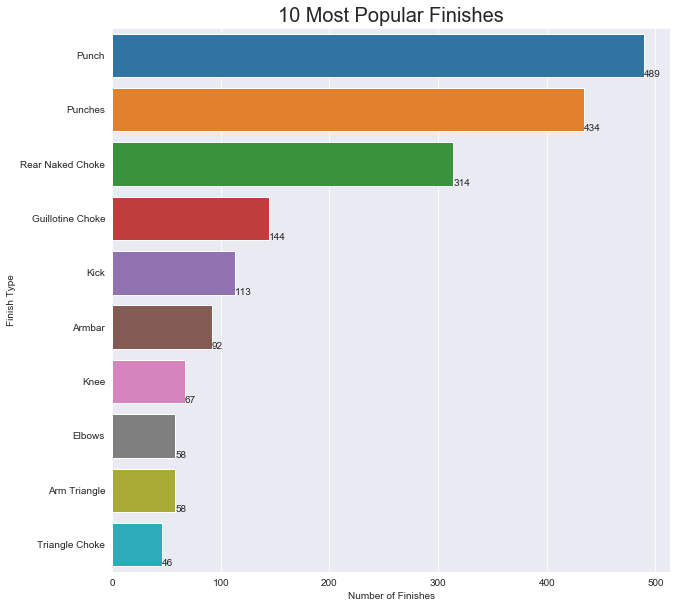

In [14]:
#create fig, ax objects
fig, ax = plt.subplots(figsize = (10,10))
#countplot of top 10 finishes
sns.countplot(data = df, y = 'finish_details', order = df['finish_details'].value_counts()[0:10].index)
#set title
ax.set_title('10 Most Popular Finishes', fontsize = 20)
#set x label
ax.set_xlabel('Number of Finishes', fontsize = 10)
#set y label
ax.set_ylabel('Finish Type')
#run for loop to have labels at the end of each bar
for i in ax.patches:
    ax.annotate(i.get_width(), (i.get_x() + i.get_width(), i.get_y() + i.get_height()))
plt.show()

# III. Clean Data, Fix Missing Values, and Feature Engineering

I will now clean the data, fix missing values and conduct feature engineering so that it can be used for machine learning. I will impute the missing data with the median and I will one hot encode the categorical columns. I will also drop one of the column categories that were in the target column and rename the remaining column to 'Winner'. 

## A) Percentage of Missing Values in Each Column

In [15]:
#print out percentage of missing features in each column
for i in df.columns:
    print(i, ':', df[i].isna().sum()/len(df), df[i].dtypes,'\n')

R_fighter : 0.0 object 

B_fighter : 0.0 object 

R_odds : 0.0 int64 

B_odds : 0.0 int64 

R_ev : 0.0 float64 

B_ev : 0.0 float64 

date : 0.0 datetime64[ns] 

location : 0.0 object 

country : 0.0 object 

Winner : 0.0 object 

title_bout : 0.0 bool 

weight_class : 0.0 object 

gender : 0.0 object 

no_of_rounds : 0.0 int64 

B_current_lose_streak : 0.0 int64 

B_current_win_streak : 0.0 int64 

B_draw : 0.0 int64 

B_avg_SIG_STR_landed : 0.20403685827117157 float64 

B_avg_SIG_STR_pct : 0.16783677051338305 float64 

B_avg_SUB_ATT : 0.18253620008775778 float64 

B_avg_TD_landed : 0.1827555945590171 float64 

B_avg_TD_pct : 0.18473014480035102 float64 

B_longest_win_streak : 0.0 int64 

B_losses : 0.0 int64 

B_total_rounds_fought : 0.0 int64 

B_total_title_bouts : 0.0 int64 

B_win_by_Decision_Majority : 0.0 int64 

B_win_by_Decision_Split : 0.0 int64 

B_win_by_Decision_Unanimous : 0.0 int64 

B_win_by_KO/TKO : 0.0 int64 

B_win_by_Submission : 0.0 int64 

B_win_by_TKO_Doctor_St

## B) Number of Columns in DataFrame

In [16]:
#see how many columns are in the dataframe
len(df.columns)

137

## C) Drop Columns With More than 70% of Missing Values

In [17]:
#drop any columns with 70% or more missing values
for i in df.columns:
    na = df[i].isna().sum() / len(df)
    if na >= 0.7:
        df.drop(i, axis = 1, inplace = True)

## D) Look at Updated DataFrame After Dropping Columns

In [18]:
#number of columns in updated dataframe
len(df.columns)

109

In [19]:
#see new percentage of missing values
for i in df.columns:
    print(i, ':', df[i].isna().sum()/len(df), df[i].dtypes,'\n')

R_fighter : 0.0 object 

B_fighter : 0.0 object 

R_odds : 0.0 int64 

B_odds : 0.0 int64 

R_ev : 0.0 float64 

B_ev : 0.0 float64 

date : 0.0 datetime64[ns] 

location : 0.0 object 

country : 0.0 object 

Winner : 0.0 object 

title_bout : 0.0 bool 

weight_class : 0.0 object 

gender : 0.0 object 

no_of_rounds : 0.0 int64 

B_current_lose_streak : 0.0 int64 

B_current_win_streak : 0.0 int64 

B_draw : 0.0 int64 

B_avg_SIG_STR_landed : 0.20403685827117157 float64 

B_avg_SIG_STR_pct : 0.16783677051338305 float64 

B_avg_SUB_ATT : 0.18253620008775778 float64 

B_avg_TD_landed : 0.1827555945590171 float64 

B_avg_TD_pct : 0.18473014480035102 float64 

B_longest_win_streak : 0.0 int64 

B_losses : 0.0 int64 

B_total_rounds_fought : 0.0 int64 

B_total_title_bouts : 0.0 int64 

B_win_by_Decision_Majority : 0.0 int64 

B_win_by_Decision_Split : 0.0 int64 

B_win_by_Decision_Unanimous : 0.0 int64 

B_win_by_KO/TKO : 0.0 int64 

B_win_by_Submission : 0.0 int64 

B_win_by_TKO_Doctor_St

## E) Analyze Columns from R_kd_bout to the End

In [20]:
#see columns from r_kd_bout to the end
df.loc[:, 'R_kd_bout':].columns

Index(['R_kd_bout', 'B_kd_bout', 'R_sig_str_landed_bout',
       'B_sig_str_landed_bout', 'R_sig_str_attempted_bout',
       'B_sig_str_attempted_bout', 'R_sig_str_pct_bout', 'B_sig_str_pct_bout',
       'R_tot_str_landed_bout', 'B_tot_str_landed_bout',
       'R_tot_str_attempted_bout', 'B_tot_str_attempted_bout',
       'R_td_landed_bout', 'B_td_landed_bout', 'R_td_attempted_bout',
       'B_td_attempted_bout', 'R_td_pct_bout', 'B_td_pct_bout',
       'R_sub_attempts_bout', 'B_sub_attempts_bout', 'R_pass_bout',
       'B_pass_bout', 'R_rev_bout', 'B_rev_bout'],
      dtype='object')

## F) Drop Missing Values From R_kd_bout Until The End

In [21]:
#drop remaining missing values
df = df.dropna(subset = ['R_kd_bout', 'B_kd_bout', 'R_sig_str_landed_bout',
       'B_sig_str_landed_bout', 'R_sig_str_attempted_bout',
       'B_sig_str_attempted_bout', 'R_sig_str_pct_bout', 'B_sig_str_pct_bout',
       'R_tot_str_landed_bout', 'B_tot_str_landed_bout',
       'R_tot_str_attempted_bout', 'B_tot_str_attempted_bout',
       'R_td_landed_bout', 'B_td_landed_bout', 'R_td_attempted_bout',
       'B_td_attempted_bout', 'R_td_pct_bout', 'B_td_pct_bout',
       'R_sub_attempts_bout', 'B_sub_attempts_bout', 'R_pass_bout',
       'B_pass_bout', 'R_rev_bout', 'B_rev_bout', 'finish_details'])

## G) Number of Missing Values in Updated DataFrame

In [22]:
#see percentage of missing values now
for i in df.columns:
    print(i, df[i].isna().sum()/len(df), df[i].dtypes)

R_fighter 0.0 object
B_fighter 0.0 object
R_odds 0.0 int64
B_odds 0.0 int64
R_ev 0.0 float64
B_ev 0.0 float64
date 0.0 datetime64[ns]
location 0.0 object
country 0.0 object
Winner 0.0 object
title_bout 0.0 bool
weight_class 0.0 object
gender 0.0 object
no_of_rounds 0.0 int64
B_current_lose_streak 0.0 int64
B_current_win_streak 0.0 int64
B_draw 0.0 int64
B_avg_SIG_STR_landed 0.2191265060240964 float64
B_avg_SIG_STR_pct 0.1852409638554217 float64
B_avg_SUB_ATT 0.2003012048192771 float64
B_avg_TD_landed 0.2003012048192771 float64
B_avg_TD_pct 0.2003012048192771 float64
B_longest_win_streak 0.0 int64
B_losses 0.0 int64
B_total_rounds_fought 0.0 int64
B_total_title_bouts 0.0 int64
B_win_by_Decision_Majority 0.0 int64
B_win_by_Decision_Split 0.0 int64
B_win_by_Decision_Unanimous 0.0 int64
B_win_by_KO/TKO 0.0 int64
B_win_by_Submission 0.0 int64
B_win_by_TKO_Doctor_Stoppage 0.0 int64
B_wins 0.0 int64
B_Stance 0.0 object
B_Height_cms 0.0 float64
B_Reach_cms 0.0 float64
B_Weight_lbs 0.0 int64
R_

## H) Impute Missing Values With Median

In [23]:
#impute missing values with the median
median = []
for i in ['B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed','B_avg_TD_pct', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct']:
    median = df[i].median()
    df[i] = df[i].fillna(median)

In [24]:
#see number of missing values 
for i in df.columns:
    print(i, df[i].isna().sum()/len(df), df[i].dtypes)

R_fighter 0.0 object
B_fighter 0.0 object
R_odds 0.0 int64
B_odds 0.0 int64
R_ev 0.0 float64
B_ev 0.0 float64
date 0.0 datetime64[ns]
location 0.0 object
country 0.0 object
Winner 0.0 object
title_bout 0.0 bool
weight_class 0.0 object
gender 0.0 object
no_of_rounds 0.0 int64
B_current_lose_streak 0.0 int64
B_current_win_streak 0.0 int64
B_draw 0.0 int64
B_avg_SIG_STR_landed 0.0 float64
B_avg_SIG_STR_pct 0.0 float64
B_avg_SUB_ATT 0.0 float64
B_avg_TD_landed 0.0 float64
B_avg_TD_pct 0.0 float64
B_longest_win_streak 0.0 int64
B_losses 0.0 int64
B_total_rounds_fought 0.0 int64
B_total_title_bouts 0.0 int64
B_win_by_Decision_Majority 0.0 int64
B_win_by_Decision_Split 0.0 int64
B_win_by_Decision_Unanimous 0.0 int64
B_win_by_KO/TKO 0.0 int64
B_win_by_Submission 0.0 int64
B_win_by_TKO_Doctor_Stoppage 0.0 int64
B_wins 0.0 int64
B_Stance 0.0 object
B_Height_cms 0.0 float64
B_Reach_cms 0.0 float64
B_Weight_lbs 0.0 int64
R_current_lose_streak 0.0 int64
R_current_win_streak 0.0 int64
R_draw 0.0 int

In [25]:
#analyze first 5 rows of each column
for i in df.columns:
    print(df[i].head(), '\n')

291            Petr Yan
293        Amanda Ribas
294     Volkan Oezdemir
296    Makwan Amirkhani
301          Martin Day
Name: R_fighter, dtype: object 

291         Jose Aldo
293     Paige VanZant
294    Jiri Prochazka
296       Danny Henry
301       Davey Grant
Name: B_fighter, dtype: object 

291   -215
293   -770
294   -159
296   -215
301   -162
Name: R_odds, dtype: int64 

291    175
293    500
294    129
296    170
301    130
Name: B_odds, dtype: int64 

291    46.511628
293    12.987013
294    62.893082
296    46.511628
301    61.728395
Name: R_ev, dtype: float64 

291    175.0
293    500.0
294    129.0
296    170.0
301    130.0
Name: B_ev, dtype: float64 

291   2020-07-11
293   2020-07-11
294   2020-07-11
296   2020-07-11
301   2020-07-11
Name: date, dtype: datetime64[ns] 

291    Abu Dhabi, Abu Dhabi, United Arab Emirates
293    Abu Dhabi, Abu Dhabi, United Arab Emirates
294    Abu Dhabi, Abu Dhabi, United Arab Emirates
296    Abu Dhabi, Abu Dhabi, United Arab Emirates
301    

## I) One Hot Encode Categorical Columns

In [26]:
#append string columns to col list 
col = []
for i in df.columns:
    if df[i].dtypes == 'O':
        col.append(i)

In [27]:
#append date to col list
col.append('date')

In [28]:
col

['R_fighter',
 'B_fighter',
 'location',
 'country',
 'Winner',
 'weight_class',
 'gender',
 'B_Stance',
 'R_Stance',
 'better_rank',
 'finish',
 'finish_details',
 'finish_round_time',
 'date']

In [29]:
col

['R_fighter',
 'B_fighter',
 'location',
 'country',
 'Winner',
 'weight_class',
 'gender',
 'B_Stance',
 'R_Stance',
 'better_rank',
 'finish',
 'finish_details',
 'finish_round_time',
 'date']

In [30]:
#one hot encode categorical features with pandas get_dummies
ufc_dummies = pd.get_dummies(df.loc[:, ['R_fighter', 'B_fighter', 'location', 'country', 'Winner',
'weight_class', 'gender', 'B_Stance', 'R_Stance', 'better_rank', 'finish', 'finish_details', 'finish_round_time', 'date']])

In [31]:
#view first 5 rows of categorical column
ufc_dummies.head()

,date,R_fighter_Aalon Cruz,R_fighter_Abel Trujillo,R_fighter_Adam Milstead,R_fighter_Adam Yandiev,R_fighter_Aisling Daly,R_fighter_Akira Corassani,R_fighter_Al Iaquinta,R_fighter_Alan Belcher,R_fighter_Alan Jouban,...,finish_round_time_4:51,finish_round_time_4:52,finish_round_time_4:53,finish_round_time_4:54,finish_round_time_4:55,finish_round_time_4:56,finish_round_time_4:57,finish_round_time_4:58,finish_round_time_4:59,finish_round_time_5:00
291,2020-07-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,2020-07-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,2020-07-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,2020-07-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301,2020-07-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## J) Concatenate One Hot Encoded Columns and Drop Other Categorical Columns

In [32]:
#concatenate one hot encoded columns to orignal dataframe
df = pd.concat([df, ufc_dummies], axis = 1)
#drop dataframe columns with categorical string 
df = df.drop(columns = ['location', 'country', 'Winner', 'R_fighter', 'B_fighter', 'Winner',
'weight_class', 'gender', 'B_Stance', 'R_Stance', 'better_rank', 'finish', 'finish_details', 'finish_round_time', 'date'])

In [33]:
df.columns

Index(['R_odds', 'B_odds', 'R_ev', 'B_ev', 'title_bout', 'no_of_rounds',
       'B_current_lose_streak', 'B_current_win_streak', 'B_draw',
       'B_avg_SIG_STR_landed',
       ...
       'finish_round_time_4:51', 'finish_round_time_4:52',
       'finish_round_time_4:53', 'finish_round_time_4:54',
       'finish_round_time_4:55', 'finish_round_time_4:56',
       'finish_round_time_4:57', 'finish_round_time_4:58',
       'finish_round_time_4:59', 'finish_round_time_5:00'],
      dtype='object', length=2088)

## K) Drop One of the Target Column Categories and Rename the Remaining One to Target Column

In [34]:
#drop winner_blue column
df = df.drop('Winner_Blue', axis = 1)
#keep winner_red to distinguish red winner and rename to winner
df = df.rename({'Winner_Red' : 'Winner'}, axis = 1)

# IV. Prepare data for Machine Learning Algorithms

## A) Drop Target Column From Feature List, Remove Features with Correlation Greater Than 0.8, and Standardize the Features 

In [35]:
#drop winner column from feature list
X = df.drop('Winner', axis = 1)
#create winner as target column
y = df['Winner']
#calculate absolute value of correlations
correlation_matrix = X.corr().abs()
#create upper triangular of the matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k = 1).astype(np.bool))
#create column list to drop with any correlation greater than 0.8
drop = [c for c in upper.columns if any(upper[c] > 0.8)]
#drop the 'drop' list
X = X.drop(drop, axis = 1)
#create a train test split of 80 train, 20 test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
#create instance of standard scaler
scaler = StandardScaler()
#transform the features in both the train and test columns
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

# V. Machine Learning Models 

I will train multiple machine learning models to see which model works the best. I will train several models which include: 

        1) K-Nearest Neighbors
        2) Logistic Regression
        3) Decision Tree
        4) Gradient Boosted Tree
        5) Random Forest Classifier
        6) Support Vector Classifier
        7) Neural Network Multilayer Perceptron
        8) Stochastic Gradient Descent Classifier
        
I will then analyze different metrics such as accuracy, precision, recall, f1 score and the auc. Finally, I will also run 10-fold cross validation to determine which model is the best model. 

## A) Train Multiple Machine Learning Models and Analyze Different Metrics

In [36]:
#instantiate the model classifiers
models = [('KNN',KNeighborsClassifier()),
('Logistic Regression', LogisticRegression()),
('Decision Tree',DecisionTreeClassifier()),
('Gradient Boosted Tree',GradientBoostingClassifier()),
('Random Forest Classifier', RandomForestClassifier()),
('Support Vector Classifier', SVC()),
('Neural Network Multilayer Perceptron', MLPClassifier(activation = 'sigmoid')),
('Stochastic Gradient Descent Classifier', SGDClassifier())
]

#run for loop to implement learning
for name, model in models:
    m = model 
    m.fit(X_train, y_train)
    predictions = m.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average = 'weighted')
    recall = recall_score(y_test, predictions, average = 'weighted')
    f1 = f1_score(y_test, predictions, average = 'weighted')
    roc_auc = roc_auc_score(y_test, predictions)
    print(name, '\n', 'accuracy:', accuracy, '\n', 'precision:', precision, '\n', 'recall:', recall, '\n', 'f1 score:', f1,'\n', 'roc_auc_score:', roc_auc, '\n')



KNN 
 accuracy: 0.5451127819548872 
 precision: 0.5497043516703561 
 recall: 0.5451127819548872 
 f1 score: 0.4130135546171591 
 roc_auc_score: 0.5066029143897997 

Logistic Regression 
 accuracy: 0.8120300751879699 
 precision: 0.8199324842719042 
 recall: 0.8120300751879699 
 f1 score: 0.8090067826909931 
 roc_auc_score: 0.803221766848816 

Decision Tree 
 accuracy: 0.8909774436090225 
 precision: 0.8910678538406395 
 recall: 0.8909774436090225 
 f1 score: 0.8910100038548335 
 roc_auc_score: 0.8905396174863388 

Gradient Boosted Tree 
 accuracy: 0.943609022556391 
 precision: 0.9437308758089703 
 recall: 0.943609022556391 
 f1 score: 0.9435487165104446 
 roc_auc_score: 0.9422814207650274 

Random Forest Classifier 
 accuracy: 0.9060150375939849 
 precision: 0.9119164370553714 
 recall: 0.9060150375939849 
 f1 score: 0.9051150299378112 
 roc_auc_score: 0.9000455373406194 

Support Vector Classifier 
 accuracy: 0.7556390977443609 
 precision: 0.7937633900569409 
 recall: 0.755639097744

## B) Precision vs. Recall with Threshold

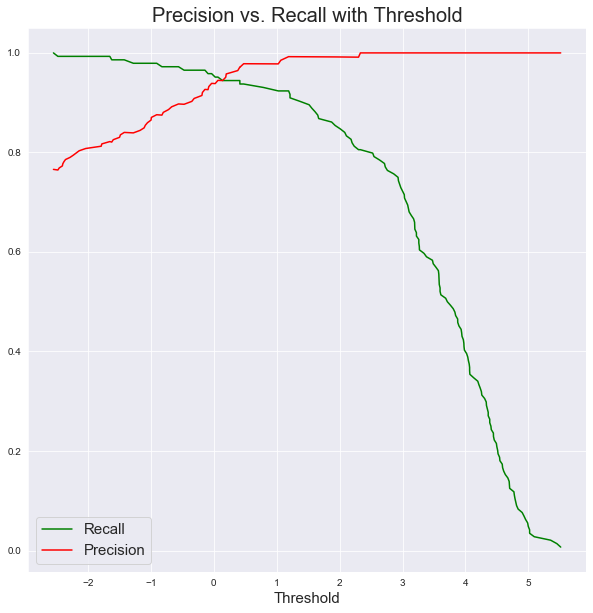

In [37]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_score = gb.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plt.figure(figsize=(10,10))
plt.plot(thresholds, recall[:-1], 'g-', label = 'Recall')
plt.plot(thresholds, precision[:-1], 'r-', label = 'Precision')
plt.xlabel('Threshold', fontsize = 15)
plt.title('Precision vs. Recall with Threshold', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

## C) Precision vs. Recall

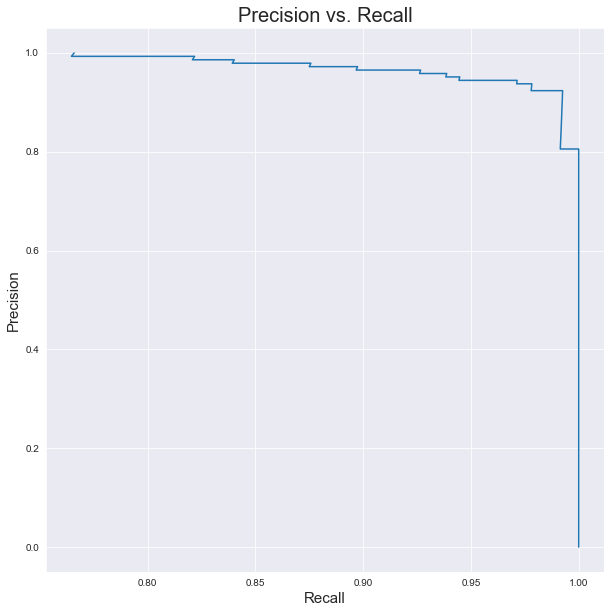

In [38]:
plt.figure(figsize = (10,10))
plt.plot(precision, recall)
plt.title('Precision vs. Recall', fontsize = 20)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)
plt.show()

## D) Histogram of True Labels, True Positive Rate/False Positive Rate at Every Threshold and ROC Curve

In [39]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_score = gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#histogram of scores compared to true labels
fig_hist = px.histogram( x = y_score, color = y_test, nbins = 50, 
labels = dict(color = 'True Labels', x = 'score'), title = 'Histogram of True Labels', opacity = 0.7,
marginal = 'box')
fig_hist.show()


df_tp = pd.DataFrame({
    'false positive rate' : fpr,
    'true positive rate' : tpr
}, index = thresholds)
df_tp.index.name = 'thresholds'
df_tp.columns.name = 'rate'

fig_thresh = px.line(df_tp, title = 'True Positive Rate (TPR) and and False Positive Rate (FPR) at every threshold',
width = 700, height = 700)

fig_thresh.update_yaxes(scaleanchor = 'x', scaleratio = 1)
fig_thresh.update_xaxes(range = [0,1], constrain = 'domain')
fig_thresh.show()

fig = px.area( x = fpr, y = tpr, 
title = 'ROC Curve of Gradient Boosting Tree Classifier',
labels = dict(x = 'False Positive Rate', y = 'True Positive Rate'),
width = 700, height = 500)

fig.add_shape(
    type = 'line', line = dict(dash = 'dash'),
    x0 = 0, x1 = 1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
fig.update_xaxes(range = [0,1], constrain = 'domain')
fig.show()


## VI.) Implement 10-Fold Cross Validation

I will now implement 10-Fold Cross Validation and take the average of each metric and see which one is the highest. In each step, we compare 1 fold vs. the rest of the folds and so on. After 10-Fold cross validation we see that the Gradient Boosted Tree Classifier is still the best. 

## A) Train Multiple Machine Learning Models and Analyze Different Metrics With 10-Fold Cross Validation

In [40]:
models = [('KNN',KNeighborsClassifier()),
('Logistic Regression', LogisticRegression()),
('Decision Tree',DecisionTreeClassifier()),
('Gradient Boosted Tree',GradientBoostingClassifier()),
('Random Forest Classifier', RandomForestClassifier()),
('Support Vector Classifier', SVC()),
('Neural Network Multilayer Perceptron', MLPClassifier(activation = 'logistic')),
('Stochastic Gradient Descent Classifier', SGDClassifier())
]

for name, model in models:
    kf = KFold(n_splits = 10, random_state = 123, shuffle = True)
    cv_score_accuracy = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy')
    cv_score_precision = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'precision')
    cv_score_recall = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'recall')
    cv_score_f1 = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'f1')
    cv_score_roc_auc = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'roc_auc')
    mean_accuracy = np.mean(cv_score_accuracy)
    mean_precision = np.mean(cv_score_precision)
    mean_recall = np.mean(cv_score_recall)
    mean_f1 = np.mean(cv_score_f1)
    mean_roc_auc = np.mean(cv_score_roc_auc)
    print(name, '\n', 'average accuracy:', mean_accuracy, '\n', 'average precision:', mean_precision, '\n', 'average recall:', mean_recall, '\n', 'average f1:', mean_f1, '\n', 'average roc auc:', mean_roc_auc, '\n')



KNN 
 average accuracy: 0.6064715217774642 
 average precision: 0.6104579519453469 
 average recall: 0.9647364597015319 
 average f1: 0.7469075927607125 
 average roc auc: 0.5417853159556151 

Logistic Regression 
 average accuracy: 0.8221301357785222 
 average precision: 0.8241633030211994 
 average recall: 0.8984696473128351 
 average f1: 0.8586086267318507 
 average roc auc: 0.8973239863828365 

Decision Tree 
 average accuracy: 0.9199612061364839 
 average precision: 0.9224990339517151 
 average recall: 0.9459240960698228 
 average f1: 0.9368447546730729 
 average roc auc: 0.9126829826034852 

Gradient Boosted Tree 
 average accuracy: 0.9444366073002998 
 average precision: 0.9464480164552741 
 average recall: 0.9611288116486824 
 average f1: 0.9537012450994945 
 average roc auc: 0.9904915558020049 

Random Forest Classifier 
 average accuracy: 0.9133838829130665 
 average precision: 0.8943685548875651 
 average recall: 0.9716597997931335 
 average f1: 0.9379873700967701 
 average 

# VII. Hyperparameter Tuning

Before testing the final model, I will now implement hyperparamter tuning on the different hyperparamters associated with gradient boosted classifier. Instead of using grid search, I will use randomized search since the hyperparameter space is big. After, it will output the best estimator. 

## A) Randomized Search CV

In [41]:
param_grid = [
{'loss' : ['deviance', 'exponential']},
{'learning_rate' : [.0001, .001, .01, .1, 1, 10, 100, 1000]},
{'n_estimators' : [1, 10, 100, 1000, 10000]},
{'subsample' : [.0001, .001, .01, .1, 1]},
{'criterion' : ['friedman_mse', 'mse', 'mae']},
{'min_samples_split' : [.0001, .001, .01, 1, 10, 100]},
{'min_samples_leaf' : [.0001, .001, .01, 1, 10, 100]},
{'min_weight_fraction_leaf' : [.0001, .001, .01, .1, 1, 10, 100]},
{'max_depth' : [1,3,6,9,12,15,18,21,24,27,30]},
{'min_impurity_decrease' : [0, .0001, .001, .01, .1, 1, 10, 100]},
{'min_impurity_split' : [.0001, .001, .01, .1, 1, 10]},
{'max_features' : ['auto', 'sqrt', 'log2']}
]

gb = GradientBoostingClassifier()
randomized_search = RandomizedSearchCV(gb, param_distributions = param_grid, cv = 10, scoring = 'accuracy', return_train_score = True)
randomized_search.fit(X_train, y_train)
print(randomized_search.best_estimator_)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## B) Cross Validation Results

In [42]:
cv_rand_results = randomized_search.cv_results_
for mean_acc, params in zip(cv_rand_results['mean_test_score'], cv_rand_results['params']):
    print(mean_acc, params)

0.9171751013930523 {'max_features': 'sqrt'}
0.9397460765297125 {'learning_rate': 0.1}
0.9416328689825427 {'min_samples_leaf': 1}
0.7937312643272791 {'max_features': 'log2'}
0.6150061717510138 {'subsample': 0.01}
0.5413154646446834 {'subsample': 0.001}
0.42805501675189567 {'learning_rate': 10}
0.7527772879562687 {'learning_rate': 1000}
0.6035796155880796 {'min_impurity_decrease': 100}
0.9181273144066303 {'n_estimators': 10}


## C) Randomized Search Best Estimator

In [43]:
randomized_search.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# VIII. Final Model

I will now use the best estimator I found in my hyperparameter tuning to get the final metrics on the dataset. I will print out the final metrics and then show feature importances, shap importances, confusion matrix of the data, and a classification report. 

## A) Metrics of Final Model

In [44]:
final_model = randomized_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
final_precision = precision_score(y_test, final_predictions, average = 'weighted')
final_recall = recall_score(y_test, final_predictions, average = 'weighted')
final_f1 = f1_score(y_test, final_predictions, average = 'weighted')
final_roc_auc = roc_auc_score(y_test, final_predictions)
print('final accuracy:', final_accuracy, '\n','final precision:', final_precision, '\n', 'final recall:', final_recall, '\n', 'final f1:', final_f1, '\n', 'final auc:', final_roc_auc)

final accuracy: 0.943609022556391 
 final precision: 0.9437308758089703 
 final recall: 0.943609022556391 
 final f1: 0.9435487165104446 
 final auc: 0.9422814207650274


## B) Precision vs. Recall with Threshold Final Model

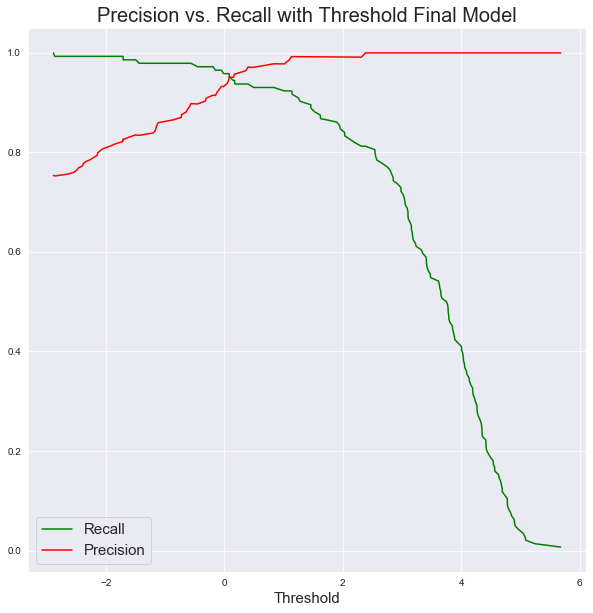

In [45]:
y_final_score = final_model.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_final_score)
plt.figure(figsize=(10,10))
plt.plot(thresholds, recall[:-1], 'g-', label = 'Recall')
plt.plot(thresholds, precision[:-1], 'r-', label = 'Precision')
plt.xlabel('Threshold', fontsize = 15)
plt.title('Precision vs. Recall with Threshold Final Model', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

## C) Precision vs. Recall Final Model

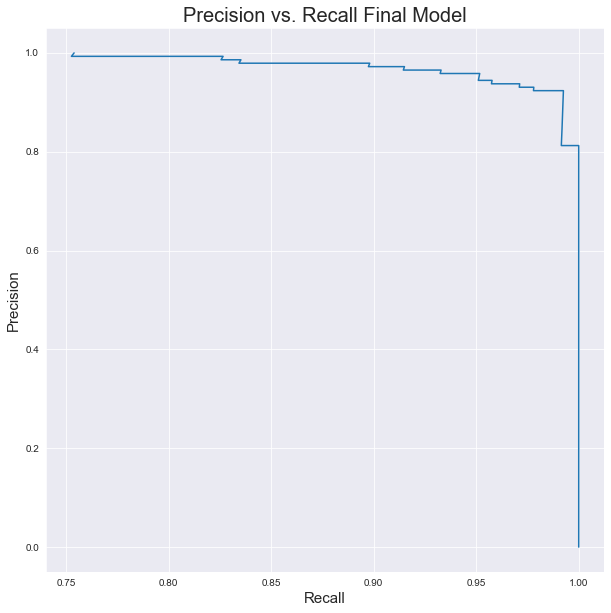

In [46]:
plt.figure(figsize = (10,10))
plt.plot(precision, recall)
plt.title('Precision vs. Recall Final Model', fontsize = 20)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)
plt.show()

## D) Histogram of True Labels, True Positive Rate/False Positive Rate at Every Threshold and ROC Curve of Final Model

In [47]:
y_score_final = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_final)

#histogram of scores compared to true labels
fig_hist = px.histogram( x = y_score_final, color = y_test, nbins = 50, 
labels = dict(color = 'True Labels', x = 'score'), title = 'Histogram of True Labels with Scores Final Model', opacity = 0.7,
marginal = 'box')
fig_hist.show()


df_tp = pd.DataFrame({
    'false positive rate' : fpr,
    'true positive rate' : tpr
}, index = thresholds)
df_tp.index.name = 'thresholds'
df_tp.columns.name = 'rate'

fig_thresh = px.line(df_tp, title = 'TPR and FPR at every threshold Final Model',
width = 700, height = 700)

fig_thresh.update_yaxes(scaleanchor = 'x', scaleratio = 1)
fig_thresh.update_xaxes(range = [0,1], constrain = 'domain')
fig_thresh.show()

fig = px.area( x = fpr, y = tpr, 
title = f'ROC Curve with AUC = {roc_auc_score(y_test,final_predictions):.4f}',
labels = dict(x = 'False Positive Rate', y = 'True Positive Rate'),
width = 700, height = 500)

fig.add_shape(
    type = 'line', line = dict(dash = 'dash'),
    x0 = 0, x1 = 1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
fig.update_xaxes(range = [0,1], constrain = 'domain')
fig.show()


## E) Number of Estimators

In [48]:
final_model.n_estimators

100

## F) Confusion Matrix of Final Model

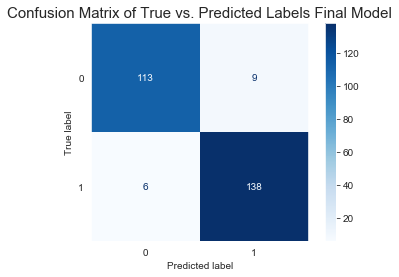

In [49]:
plot_confusion_matrix(final_model, X_test, y_test, cmap = 'Blues')
plt.grid(False)
plt.title('Confusion Matrix of True vs. Predicted Labels Final Model', fontsize = 15)
plt.show()

## G) Classification Report

In [50]:
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       122
           1       0.94      0.96      0.95       144

    accuracy                           0.94       266
   macro avg       0.94      0.94      0.94       266
weighted avg       0.94      0.94      0.94       266



## H) Feature Importances in the Gradient Boosting Tree Classifier

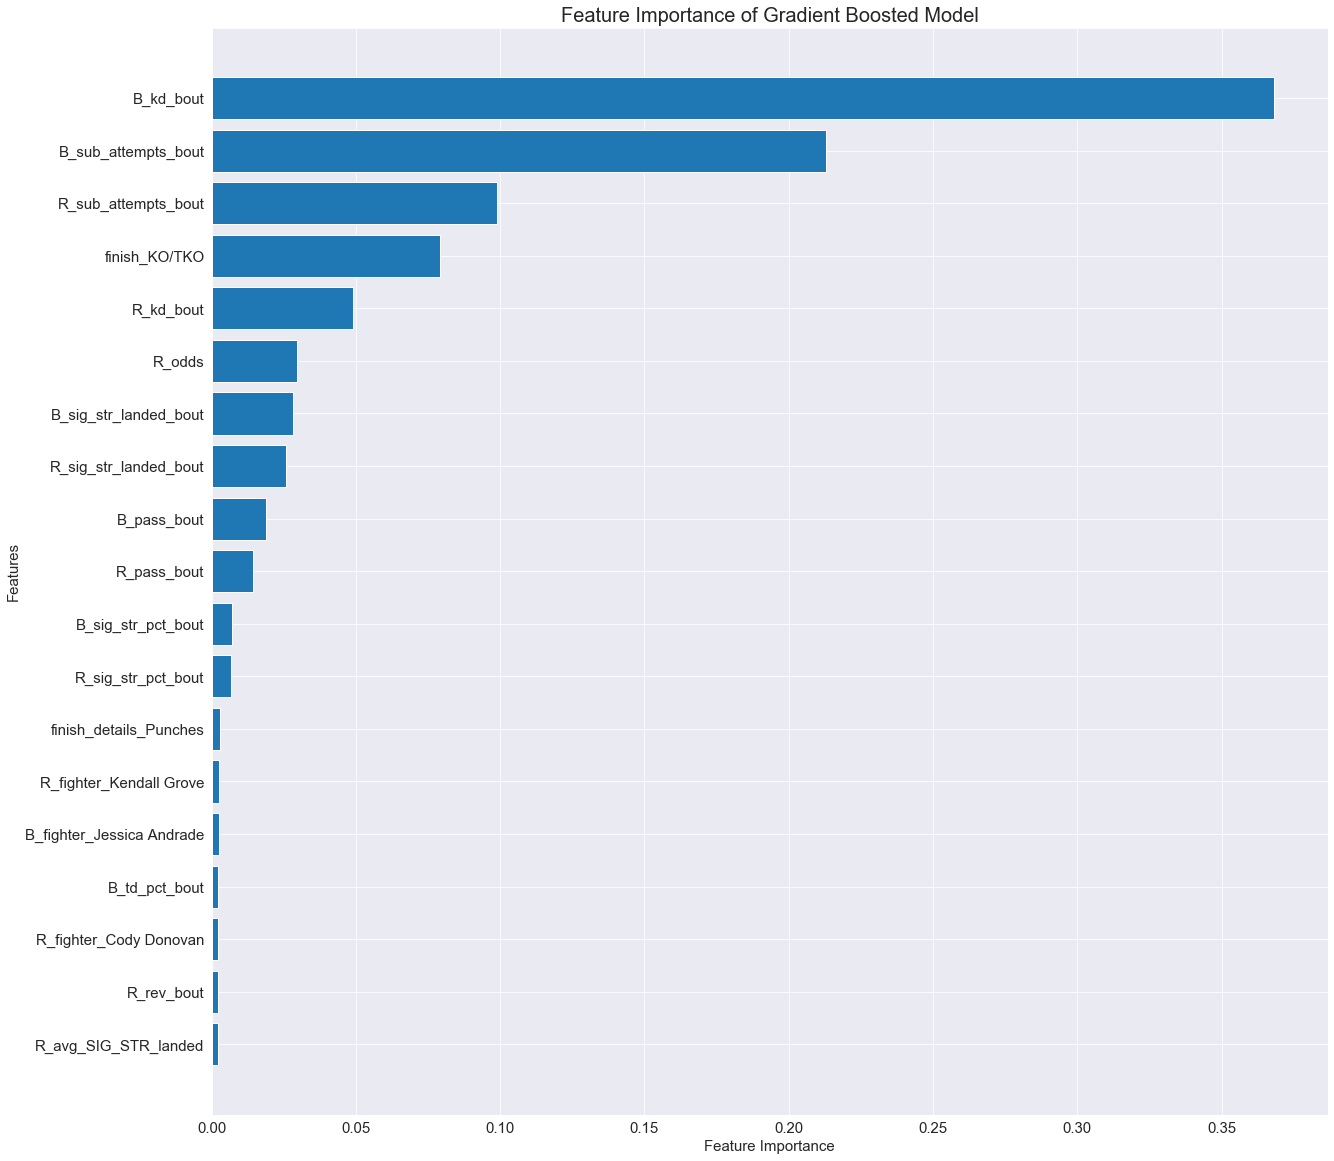

In [63]:
plt.figure(figsize = (20,20))
idx = np.argsort(np.abs(final_model.feature_importances_))[-20:][1::]
feature_importances_sorted = np.abs(final_model.feature_importances_[idx])
col_names = X_test.columns[idx]
plt.barh(col_names, feature_importances_sorted)
plt.title('Feature Importance of Gradient Boosted Model', fontsize = 20)
plt.xlabel('Feature Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## I) Shap Feature Importance BeeHive Plot

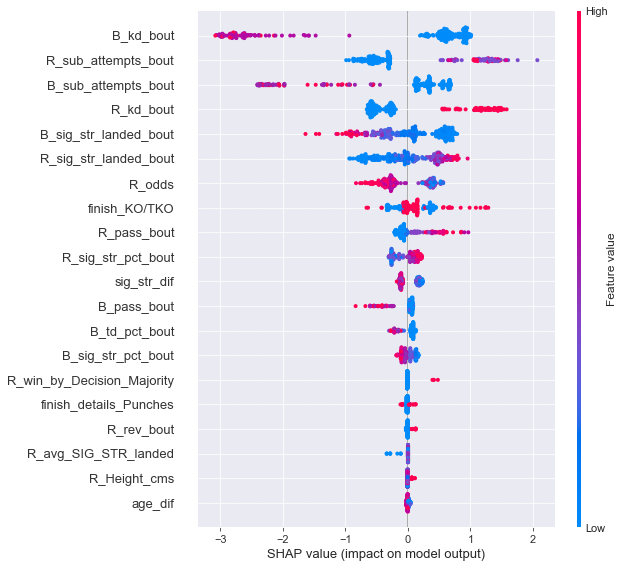

In [52]:
feature_explainablity = shap.TreeExplainer(final_model)
shap_values = feature_explainablity.shap_values(X_test)
shap.summary_plot(shap_values, features = X_test, feature_names = X_test.columns)

## J) Shap Value Feature Importance Bar Plot

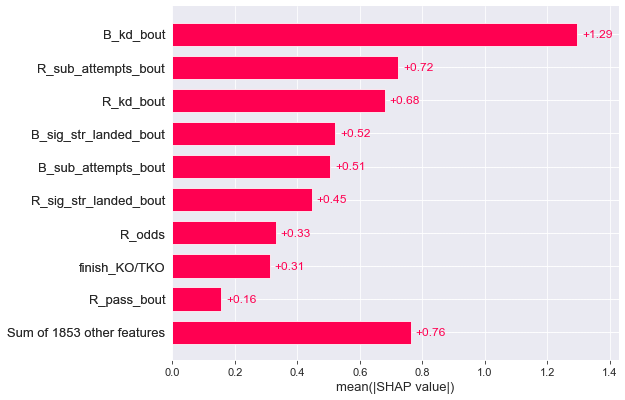

In [53]:
explainer = shap.Explainer(final_model, X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

## K) HeatMap of Shap Value Feature Importances

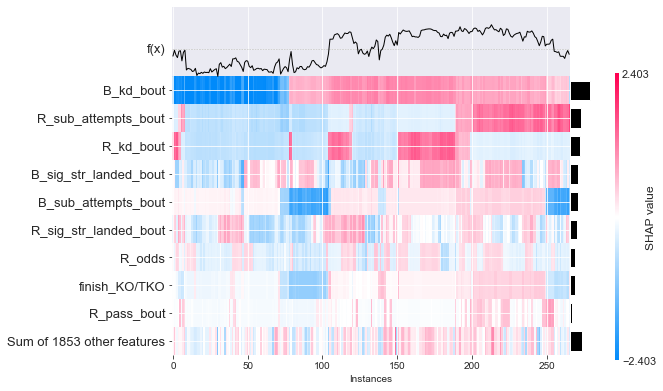

In [54]:
shap.plots.heatmap(shap_values)

## L) Final Predictions

In [55]:
final_predictions

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1], dtype=uint8)

In [56]:
pred = pd.Series(final_predictions)

In [57]:
y_test_copy = y_test.copy()
y_test_copy.index = range(len(y_test_copy))

In [58]:
y_test.iloc[0:51]

4170    1
688     1
3488    0
902     0
486     1
2367    1
2715    1
1934    0
1465    1
2134    1
3652    1
1792    0
3154    1
441     1
557     0
1778    1
1043    0
3775    0
3573    1
1212    0
1601    0
2946    0
4268    1
2740    0
3176    1
2837    1
2103    1
1325    1
2674    1
2785    0
3536    0
1065    0
2226    0
1910    0
4409    0
2151    1
2787    0
1721    0
1257    0
947     1
2791    0
1140    1
562     0
444     1
3477    0
2108    1
3045    0
1472    0
1476    1
4188    1
4432    1
Name: Winner, dtype: uint8

In [59]:
df_test_vs_pred = pd.concat([y_test_copy, pred], axis = 1)

In [60]:
df_test_vs_pred.columns = ['winner', 'prediction']

In [61]:
df_test_vs_pred.loc[:, ['winner', 'prediction']]

,winner,prediction
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
261,1,0
262,0,0
263,0,0
264,0,0


In [62]:
df_test_vs_pred[(df_test_vs_pred['winner'] != df_test_vs_pred['prediction'])]

,winner,prediction
22,1,0
38,0,1
39,1,0
53,0,1
88,1,0
89,0,1
148,1,0
152,0,1
154,0,1
178,0,1


# IX. Conclusion

The final model was a Gradient Boosted Classifier with 94.4% accuracy. I am hoping that I can further develop my model in the future with maybe a Bayesian Optimization approach in the hyperparameter tuning. But for now, this accuracy seems good to me. I will also try to futher feature engineer next time. Thank you for reading my project. 